<a href="https://colab.research.google.com/github/shawiii217/demo/blob/main/Employee_attrition_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


Loading Dataset

In [ ]:
# Load dataset (upload to Colab or mount Google Drive)
df = pd.read_csv("Dataset01-Employee_Attrition.csv")

# Basic info
print("Shape:", df.shape)
df.head()


Shape: (14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Exploratory Data Analysis (EDA)

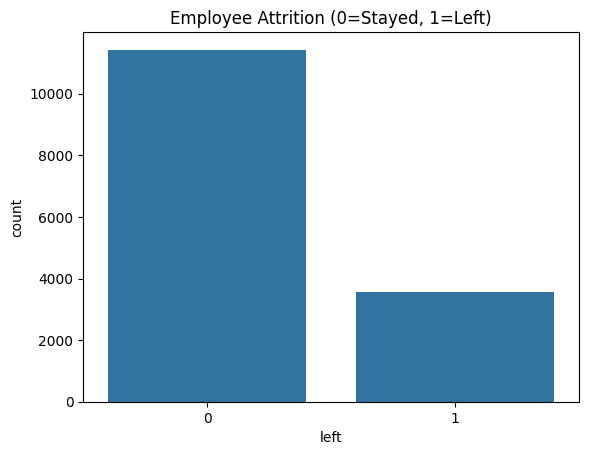

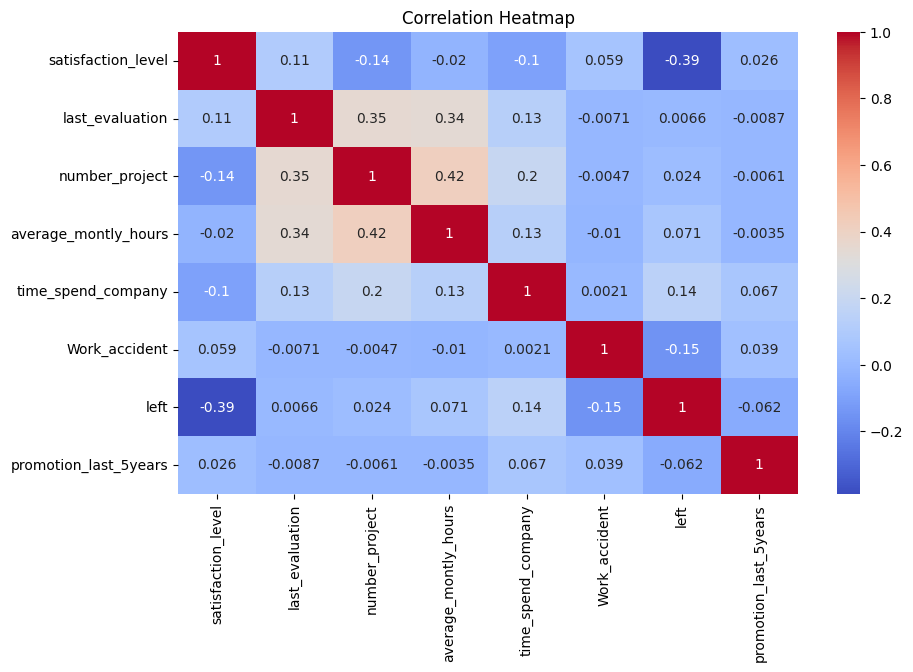

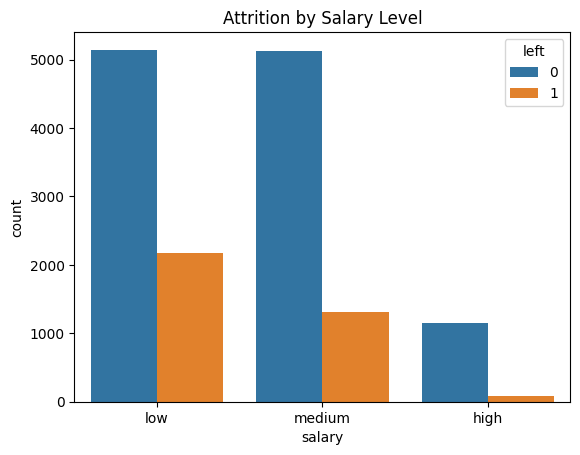

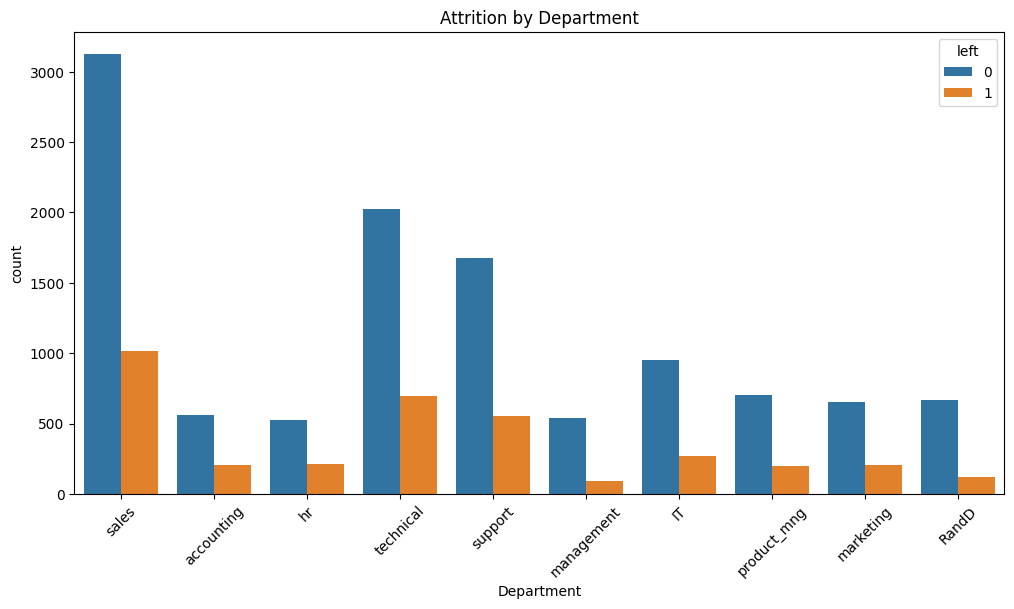

In [ ]:
# Target distribution
sns.countplot(x="left", data=df)
plt.title("Employee Attrition (0=Stayed, 1=Left)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Attrition by Salary
sns.countplot(x="salary", hue="left", data=df)
plt.title("Attrition by Salary Level")
plt.show()

# Attrition by Department
plt.figure(figsize=(12,6))
sns.countplot(x="Department", hue="left", data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

Data Preprocessing

In [ ]:
# Encode salary (ordinal: low < medium < high)
salary_map = {"low": 0, "medium": 1, "high": 2}
df["salary"] = df["salary"].map(salary_map)

# One-hot encode Department
df = pd.get_dummies(df, columns=["Department"], drop_first=True)

# Features & target
X = df.drop("left", axis=1)
y = df["left"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


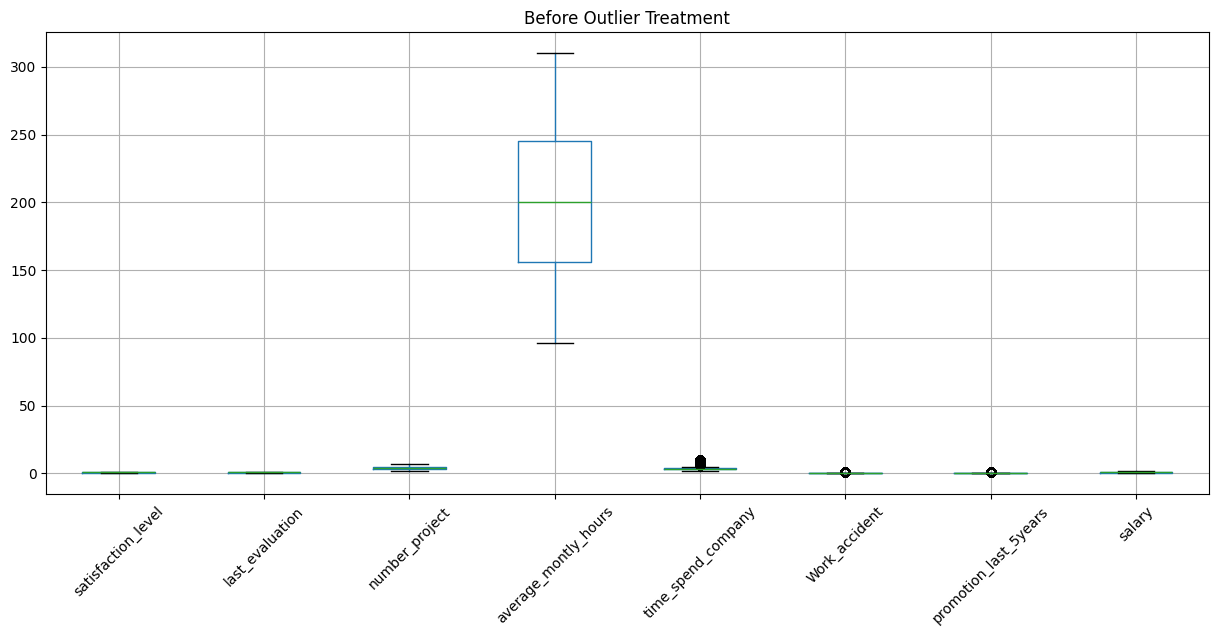

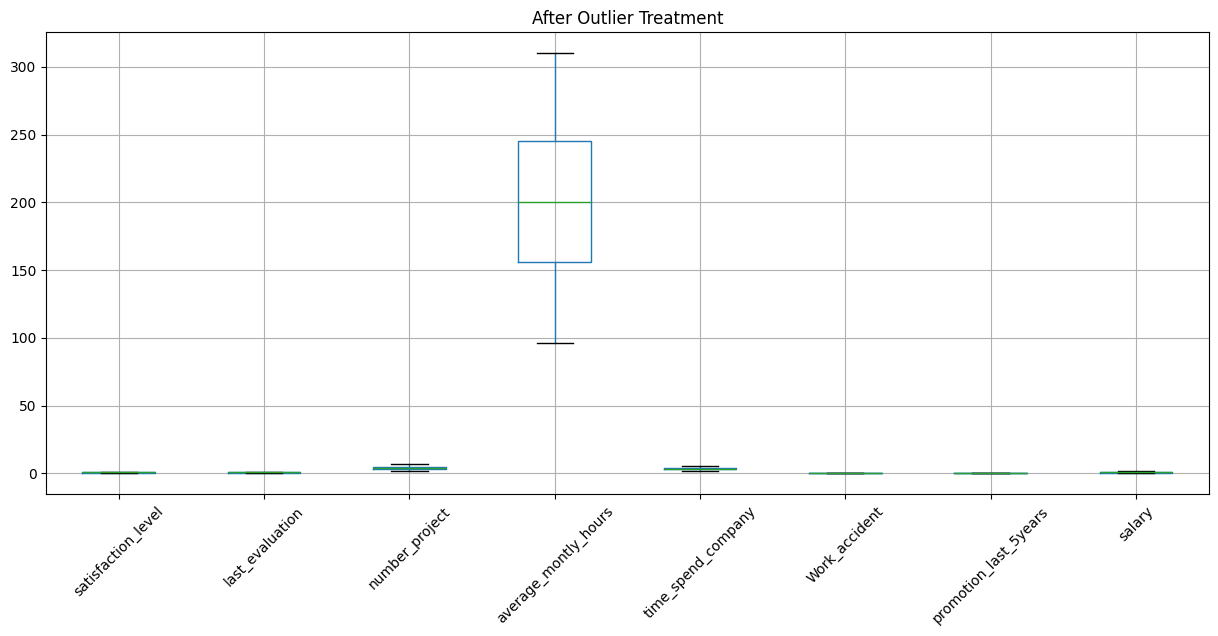

✅ Outliers capped successfully in numeric columns!


In [ ]:
# Outlier Handling using IQR Method with Visualization
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap values outside the range
    df[column] = np.where(df[column] < lower_limit, lower_limit,
                          np.where(df[column] > upper_limit, upper_limit, df[column]))
    return df

# Select numeric columns (excluding target 'left')
num_cols = df.drop("left", axis=1).select_dtypes(include=np.number).columns

# Plot boxplots before capping
plt.figure(figsize=(15, 6))
df[num_cols].boxplot()
plt.title("Before Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

# Apply outlier capping
for col in num_cols:
    df = cap_outliers(df, col)

# Plot boxplots after capping
plt.figure(figsize=(15, 6))
df[num_cols].boxplot()
plt.title("After Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

print("✅ Outliers capped successfully in numeric columns!")


Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7886666666666666
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.35      0.44       706

    accuracy                           0.79      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.77      0.79      0.77      3000



Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9886666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



XGBoost

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:37:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.987
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
# Compare Train vs Test Accuracy for the best model (example: Random Forest)
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", round(train_acc*100, 2), "%")
print("Test Accuracy:", round(test_acc*100, 2), "%")

if abs(train_acc - test_acc) > 0.1:
    print("⚠️ Possible Overfitting Detected!")
else:
    print("✅ Model is generalizing well.")


Training Accuracy: 100.0 %
Test Accuracy: 98.87 %
✅ Model is generalizing well.


Confusion Matrix & ROC Curve

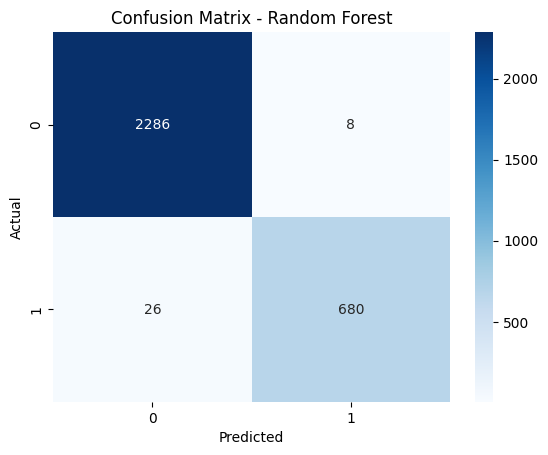

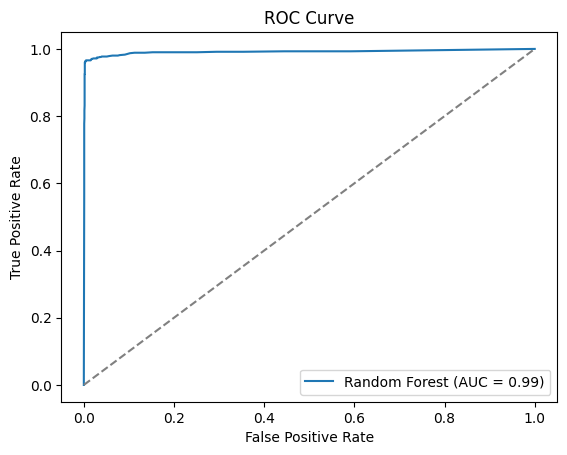

In [ ]:
# Confusion Matrix for Random Forest (baseline example)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_prob_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Feature Importance

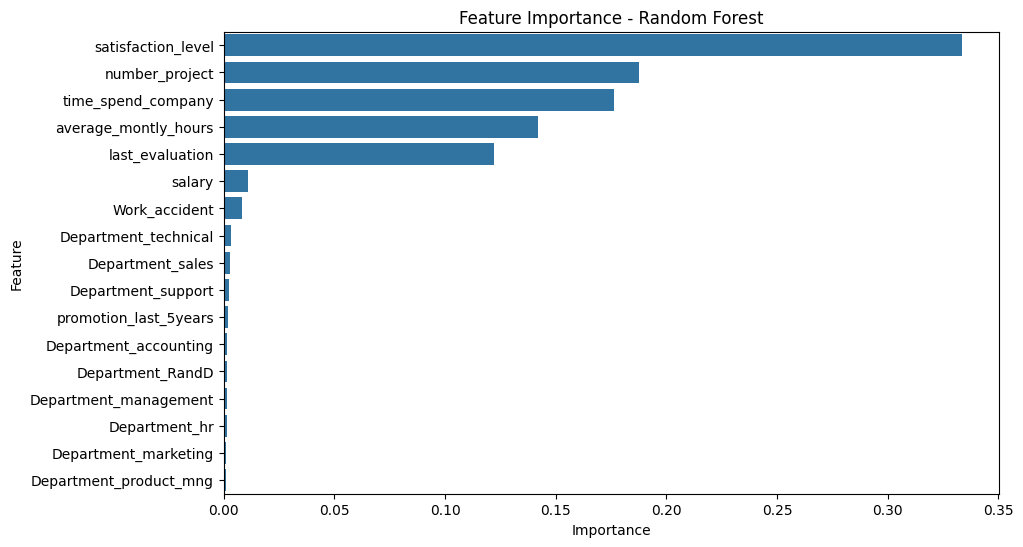

In [ ]:
# Feature importance from Random Forest
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance - Random Forest")
plt.show()


Model Comparison

                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.788667  0.813663
1        Random Forest  0.988667  0.991209
2              XGBoost  0.987000  0.991416


/tmp/ipython-input-221495782.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


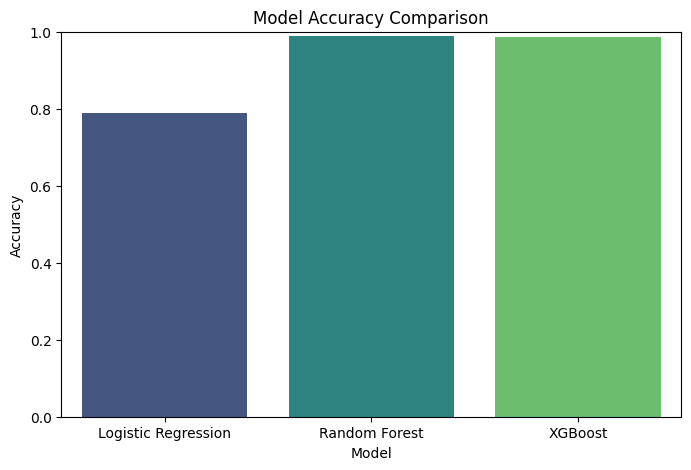

/tmp/ipython-input-221495782.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="ROC-AUC", data=results_df, palette="magma")


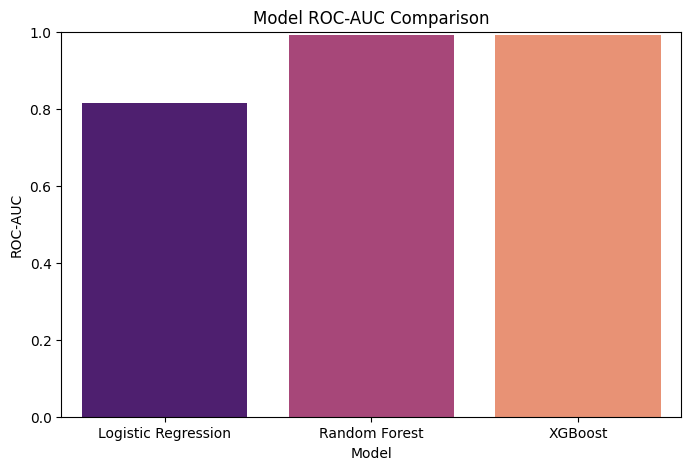

In [ ]:
# Collect results
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
    ]
}

results_df = pd.DataFrame(results)

# Show table
print(results_df)

# Accuracy Comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

# ROC-AUC Comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="ROC-AUC", data=results_df, palette="magma")
plt.title("Model ROC-AUC Comparison")
plt.ylim(0,1)
plt.show()




Save Best Model Predictions

In [ ]:
# Pick the best model based on accuracy
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]

if best_model_name == "Logistic Regression":
    best_model = log_reg
elif best_model_name == "Random Forest":
    best_model = rf
else:
    best_model = xgb

print(f"✅ Best Model Selected: {best_model_name}")

# Predictions on test set
final_predictions = best_model.predict(X_test)

# Save to CSV
output = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": final_predictions
})
output.to_csv("employee_attrition_predictions.csv", index=False)

print("📂 Predictions saved as employee_attrition_predictions.csv")


✅ Best Model Selected: Random Forest
📂 Predictions saved as employee_attrition_predictions.csv


Download Predictions (from Colab)

In [ ]:
from google.colab import files
files.download("employee_attrition_predictions.csv")